<a href="https://colab.research.google.com/github/MittalMonika/DataScience/blob/master/Yolov7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training YOLOv7 on a Custom Dataset (identify Tables)

This notebook is based on the [YOLOv7 repository](https://github.com/WongKinYiu/yolov7) by WongKinYiu and performs training on own custom objects and here i am using a docyment set and trying to tag tables from the scanned/screenshot images


### **Steps that are followed**

To train the yolov7 follow steps:

* Install YOLOv7 and all its dependencies
* Load custom dataset here i took document-parts dataset
* Run YOLOv7 training
* Evaluate YOLOv7 performance
* Run YOLOv7 inference on test images

### Preparing a Custom Dataset
In this i am taking an open source computer vision dataset from [Roboflow Universe](https://universe.roboflow.com)

For future when we need our own images (and, optionally, annotations), we can convert your dataset using [Roboflow](https://roboflow.com), a set of tools use to build better computer vision models quickly and accurately. It say it can be used for (automatic) annotation, converting dataset formats (like to YOLOv7), training, deploying, and improving their datasets/models.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    1. Prepare Our dataset
    2. Annotating the dataset : we need to annotate the dataset. Yolov7 basically need a file which has a same name of the image and annotation text images_1.jpg images_1.txtThere are some tools which we can use like LabelImg which basically will create a same textfile name  as of image but manually we need to draw one/multiple bounding to tag different parts that image conatins
    3. Split dataset basically into train,test folder
    

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7AYqESZRPUq2cAzO32G5")
project = rf.workspace("roboflow-100").project("document-parts")
dataset = project.version(2).download("yolov7")

In [ ]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


    4. Custom Config file for training
        1. we need to define a customized configuration file as the training process will be entirely dependent on that file
            1. we create this file
            2. basically this file
                1. definesimage path (test,train,validation)
                2. Number of classes : nc : numbercount
                3. classes_array_name : manes__=[‘table’]
    5. Ready for preprocessing of our Model
        1. Training
            1. A GitHub repository where we can clone the yolov7 model and then activate this simple commands to set the virtual environment
            2. The official repository contain pre-trained weights for the model which we can use as a stating point instead of some arbitary weights
                1. We can train the model and configure some of the arguments to the model like
					— img = size of images on which model will train; the default value is 640.
					— batch-size = batch size used for custom dataset training.
					— epochs = number of training epochs to get the best model
					— data = custom config file path
					— weights = pretrained yolov7 weights

	Note : If any image is corrupted, training will not begin. If any label file is corrupted, training will not begin because yolov7 will ignore that image and label files. so we need to check all these things before


In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

In [5]:
%cd /content/drive/MyDrive/yolov7

/content/drive/MyDrive/yolov7


In [ ]:
# download COCO starting checkpoint
%cd /content/drive/MyDrive/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt



In [ ]:
# run this cell to begin training
# %cd /content/yolov7
#!python train.py --batch 16 --epochs 40 --data {dataset.location}/data.yaml --weights 'yolov7_training.pt' --device 0

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.1 --source document-parts-2/test/images

After training we have some custom trained weights basically which are save after the model is run and usually save in as the name best.pt

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.1 --source /content/drive/MyDrive/test_1

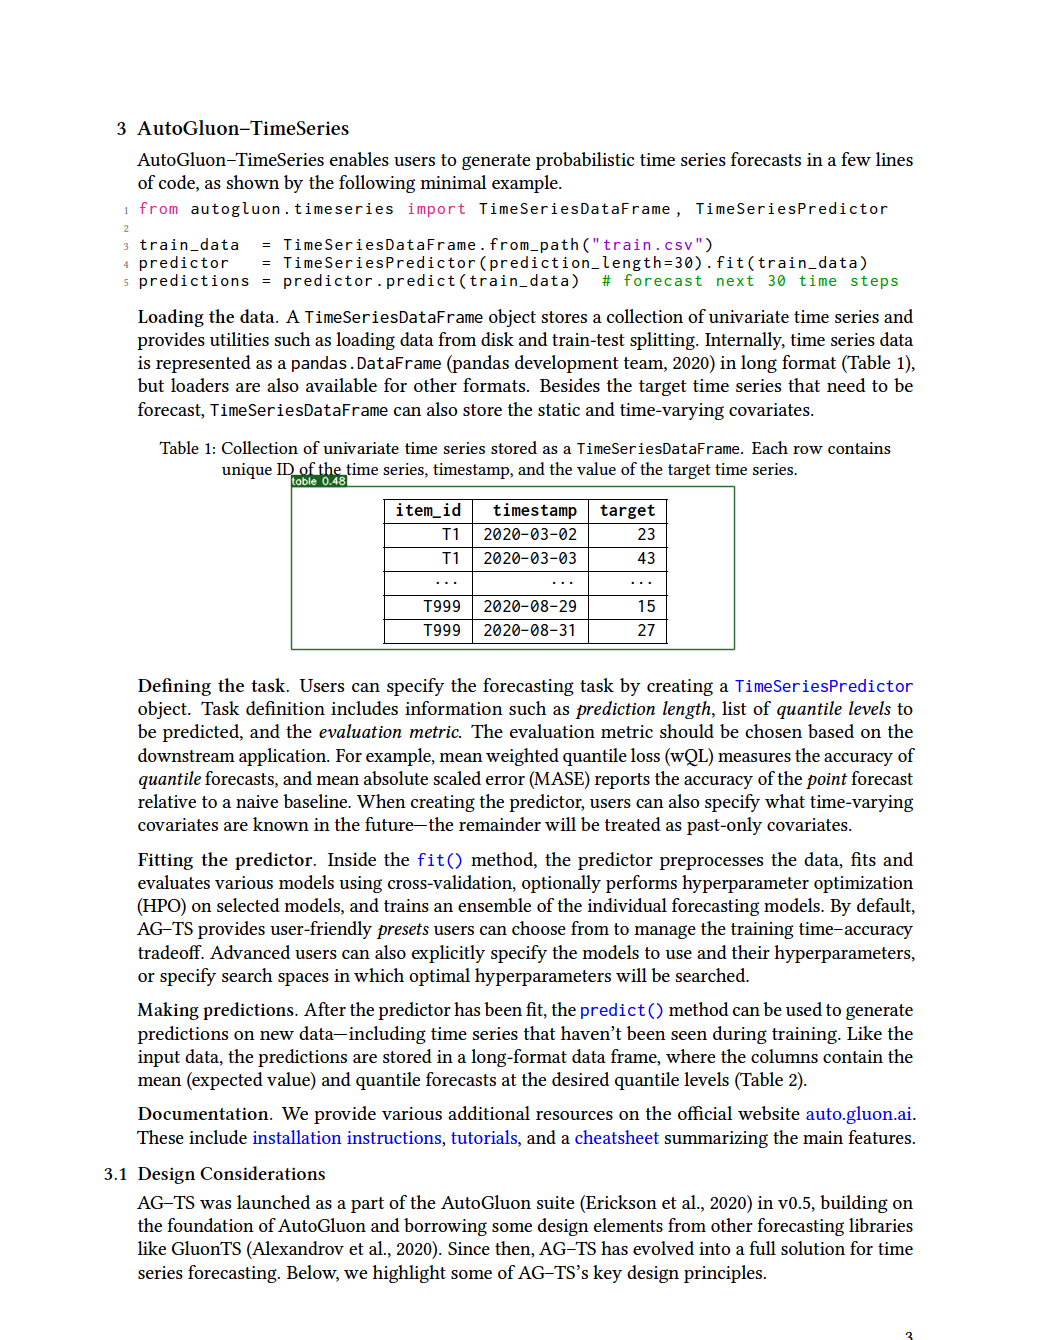

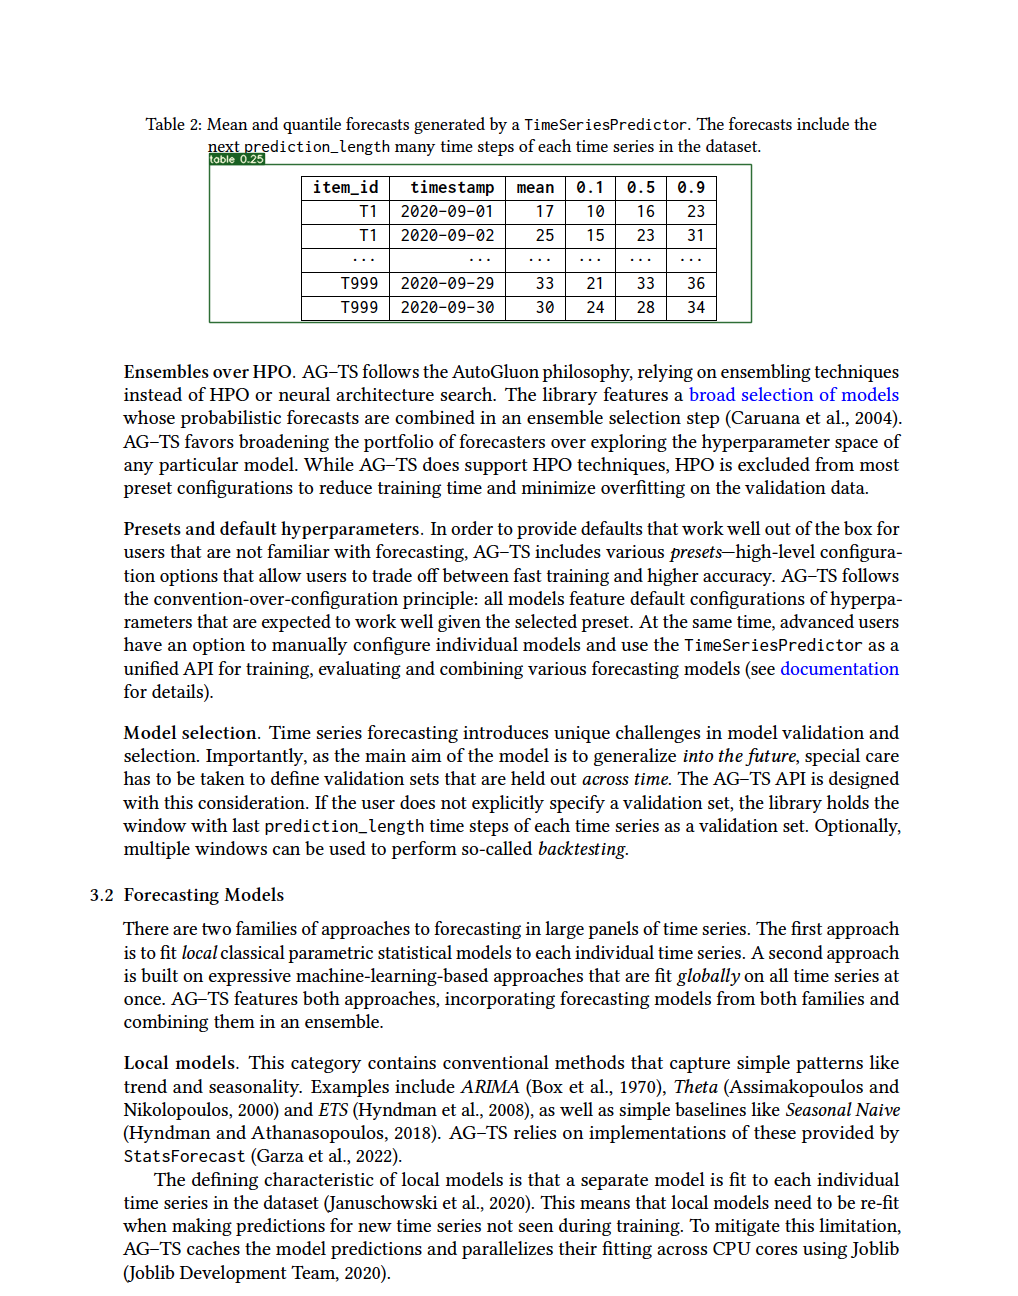

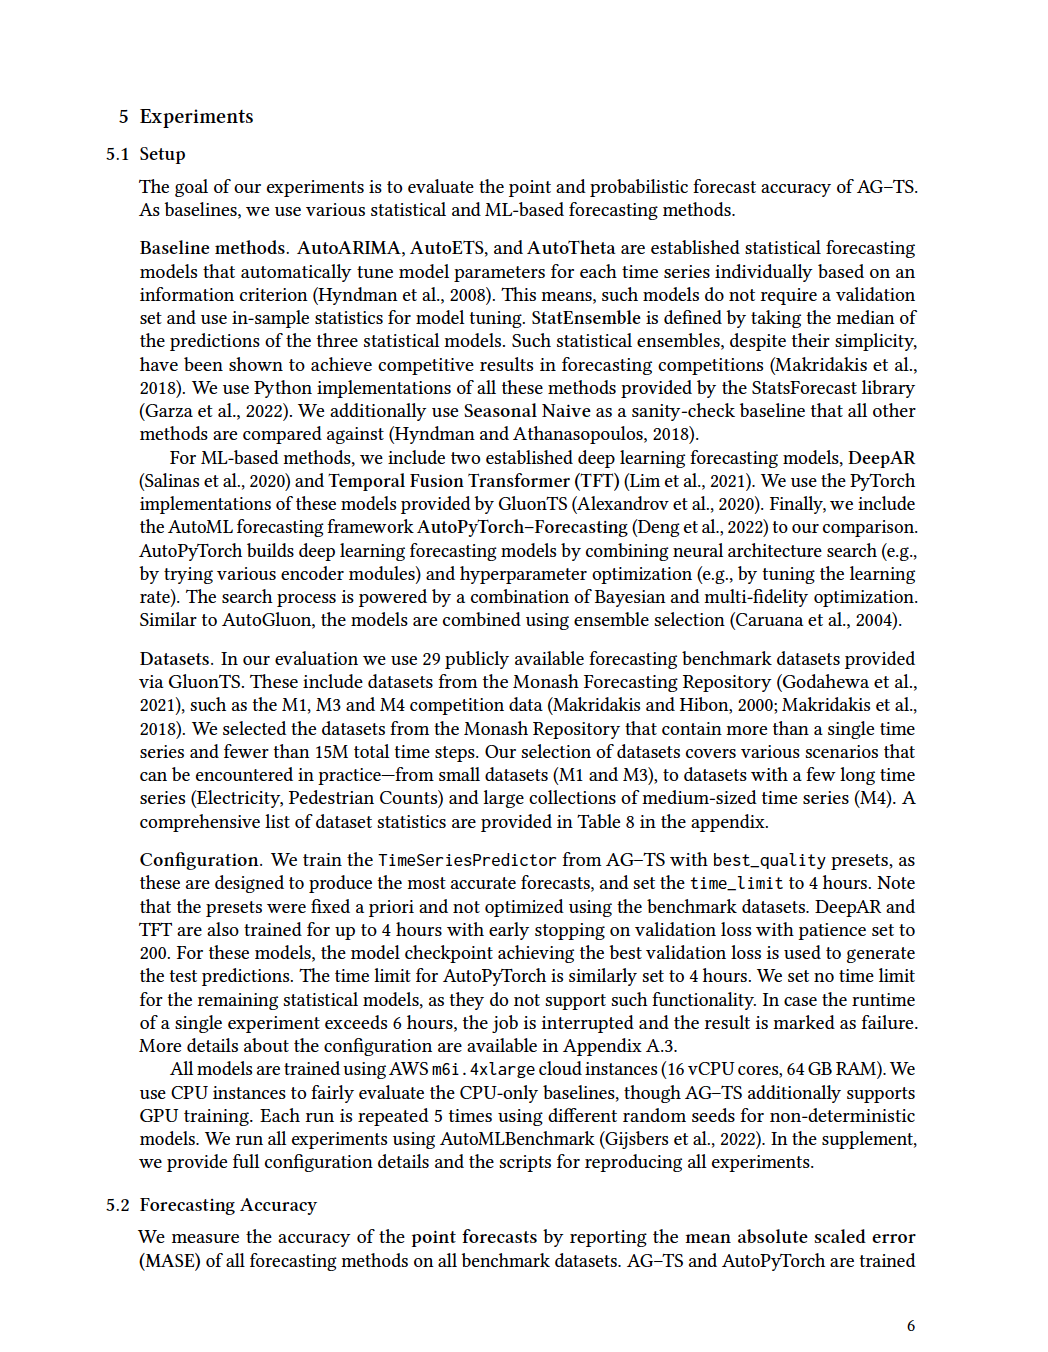

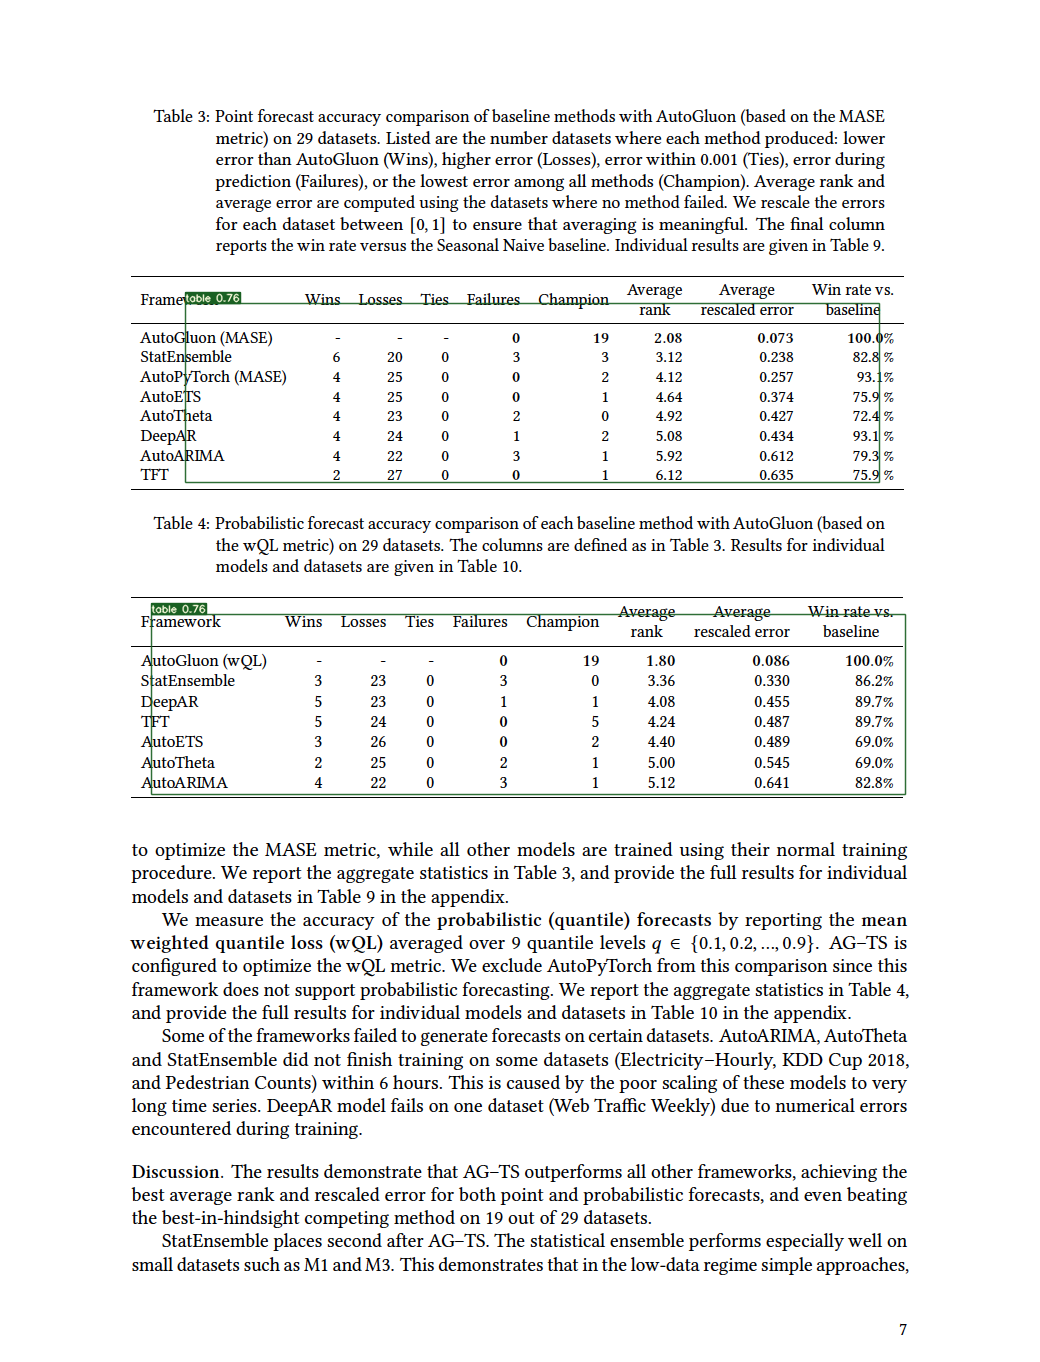

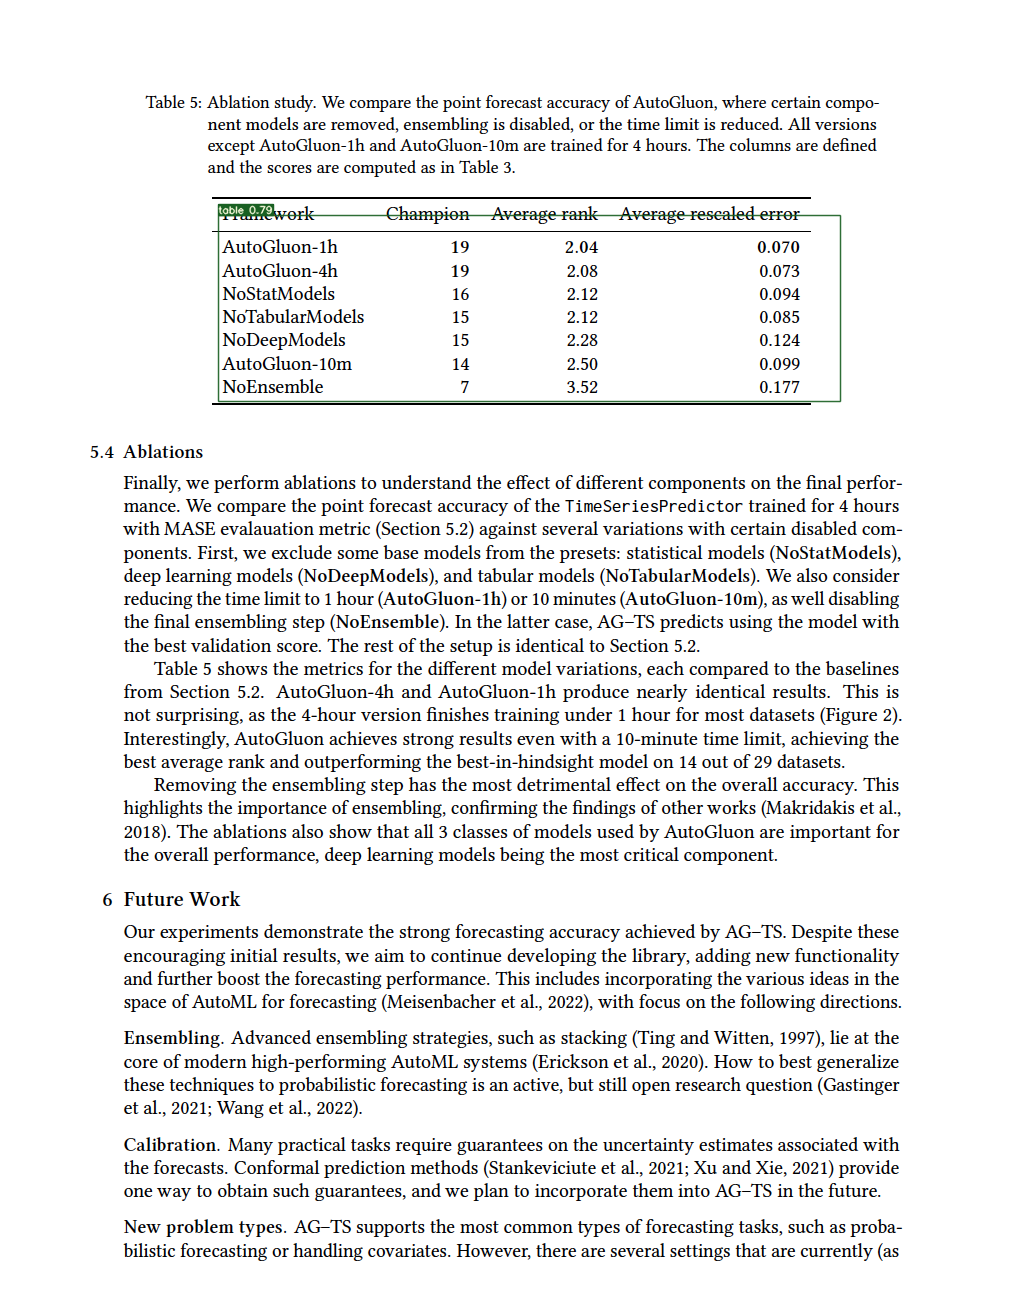

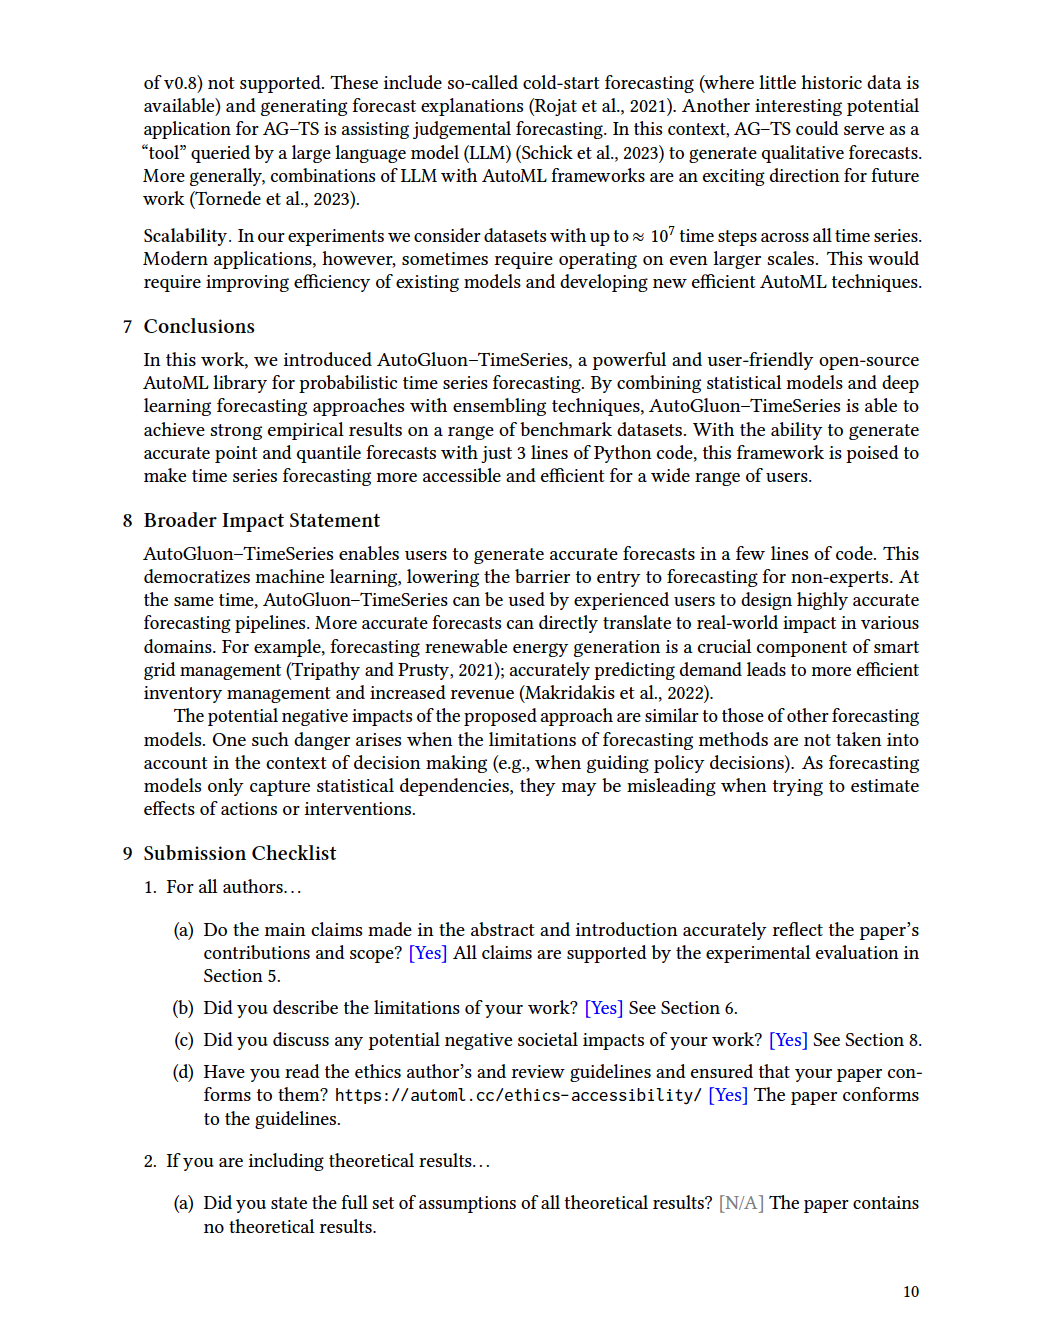

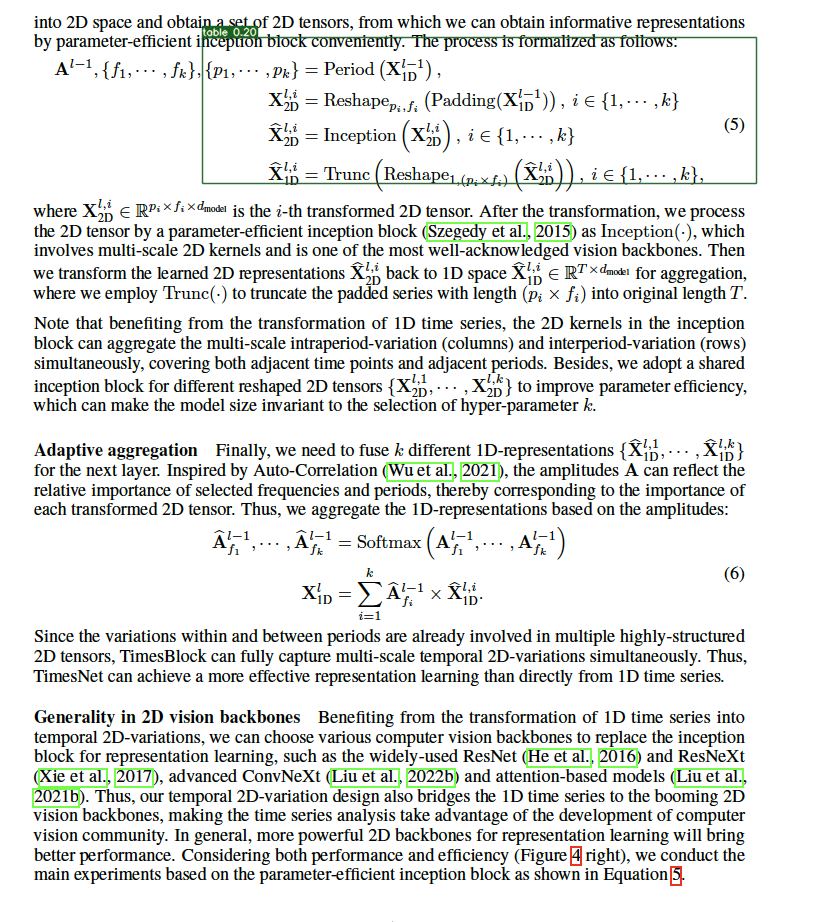

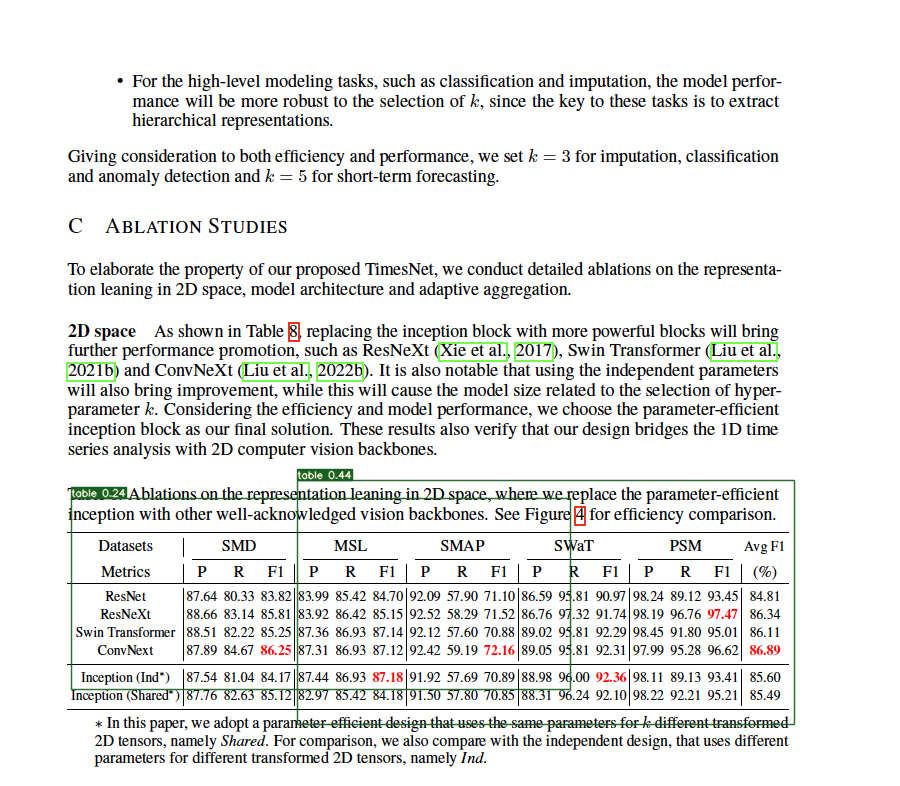

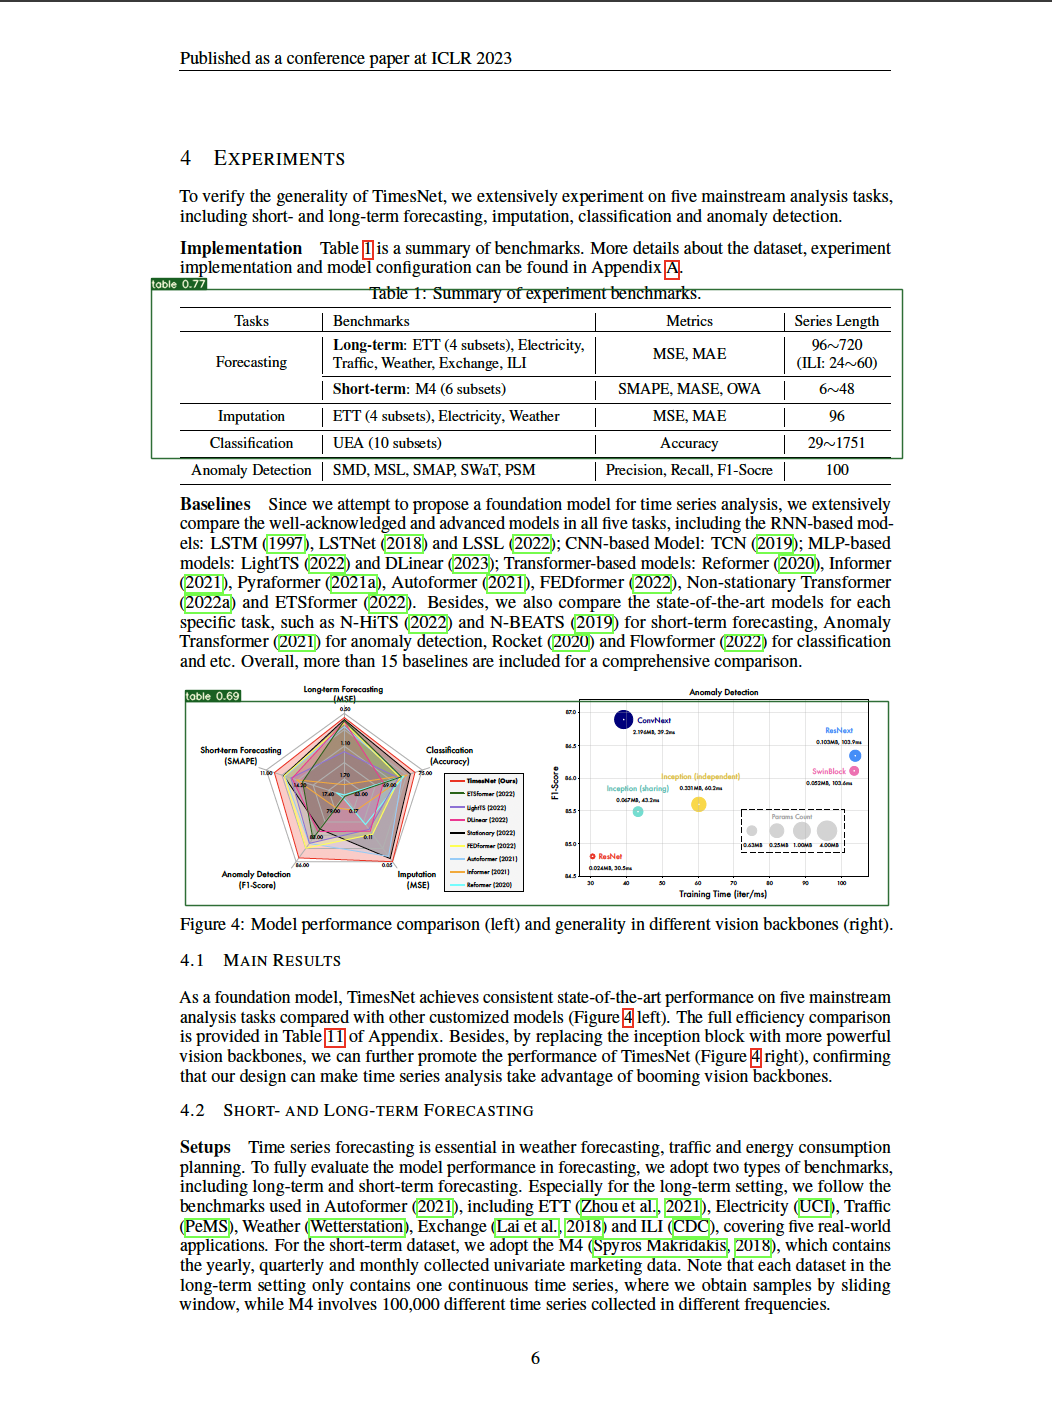

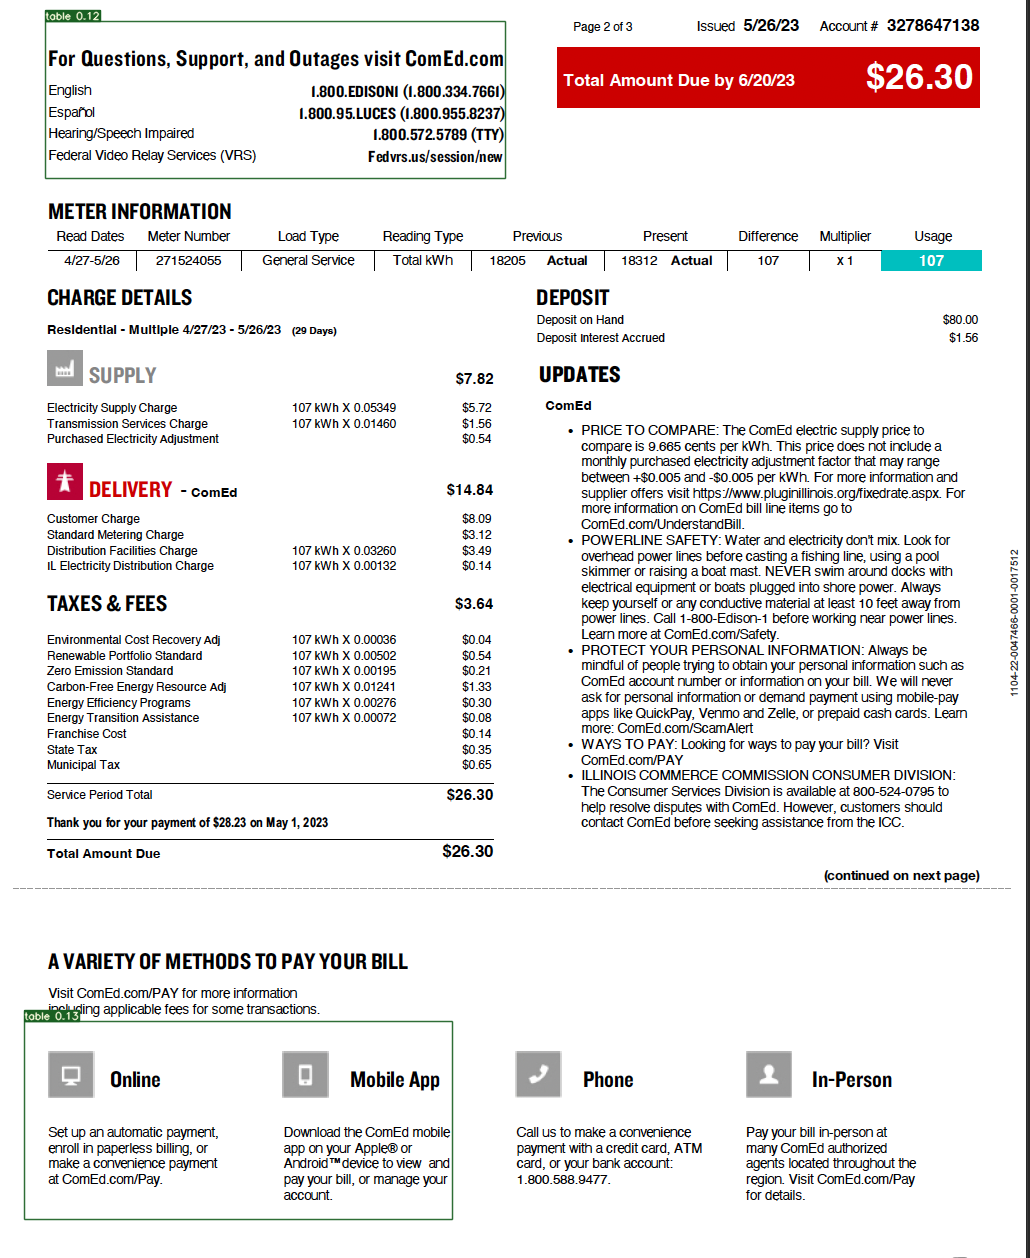

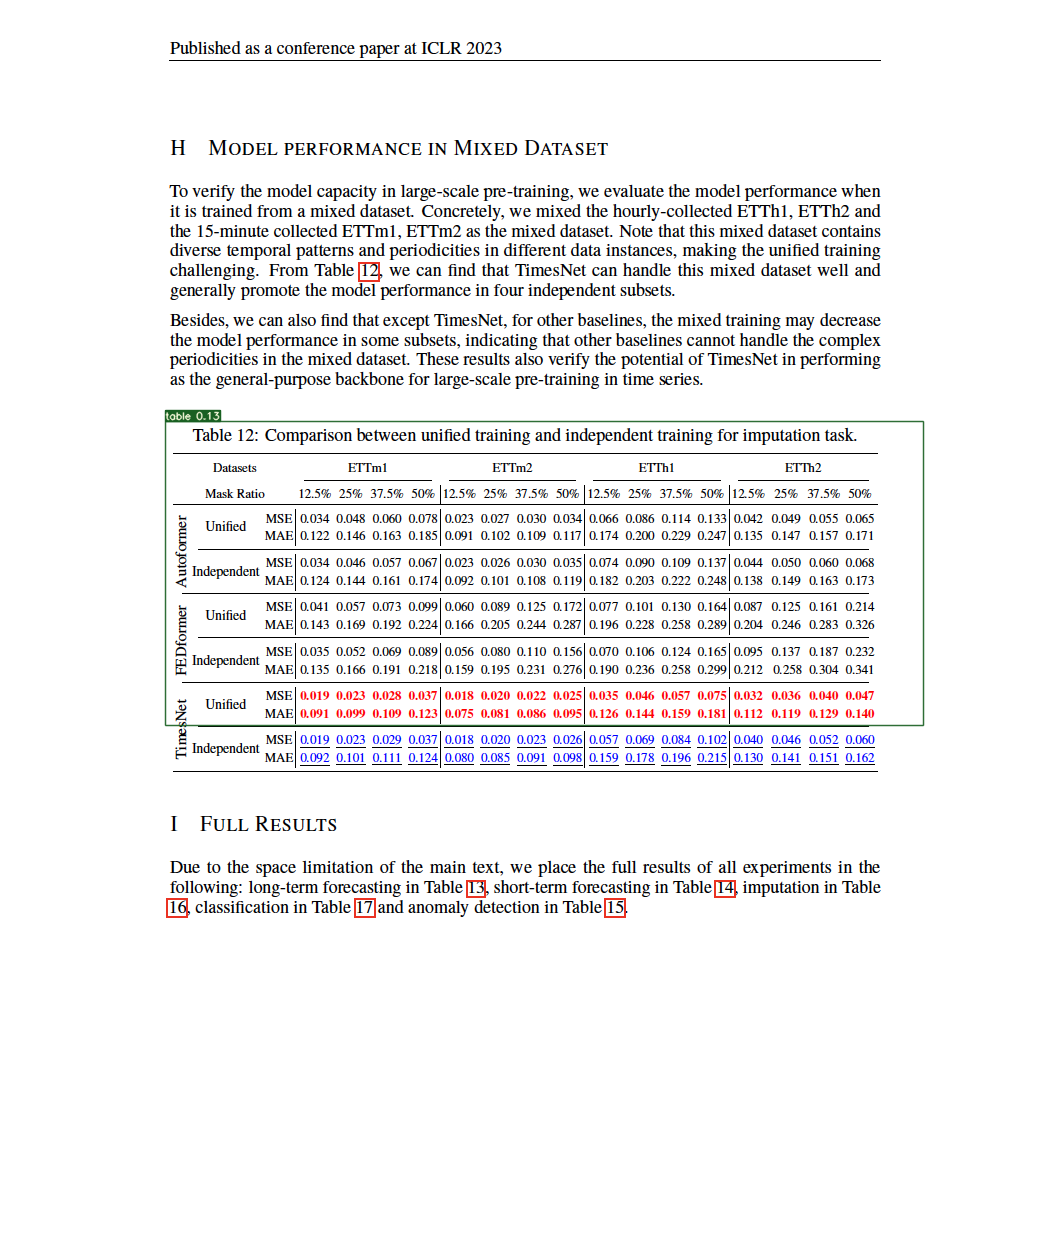

In [7]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/yolov7/runs/detect/exp4/*.png'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
